In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import networkx as nx
import geopandas as gpd
import pandas as pd
from shapely.geometry import Polygon,MultiPolygon,LineString,MultiLineString,LinearRing,Point
from shapely import symmetric_difference
import scipy
import time
import numpy as np
import random
from networkx.drawing.nx_pydot import graphviz_layout
import matplotlib.pyplot as plt
import osmnx as ox
import glob
from itertools import combinations,product
from copy import deepcopy
import os
from lib_contour_lines import *
import mysql.connector


In [2]:

cnx = mysql.connector.connect(user='spirz', 
                              password='this_is_my_PASSWORD_m8',
                              host='localhost',
                              database='dem_from_contours_lines',
                              autocommit=True)
cursor = cnx.cursor(buffered=True,dictionary=True)
contours_lines_table_name='contours_lines'
tree_edges_table_name="tree_edges"
2

2

In [15]:
level=500
t1=time.time()
level_open_contours_df=get_level_contours_df(cursor,level,is_closed=False)
crs=level_open_contours_df.estimate_utm_crs()
level_open_contours_df=level_open_contours_df.to_crs(crs)
t2=time.time()
print(t2-t1)
level_open_contours_df

1.5283489227294922


,id,source,is_closed,elevation,geometry
id,,,,,
38,38,0,0,500.0,"LINESTRING (493778.106 4651395.223, 493782.811..."
2550,2550,0,0,500.0,"LINESTRING (502956.410 4657813.303, 502954.478..."
4206,4206,0,0,500.0,"LINESTRING (480665.996 4652391.477, 480670.740..."
7629,7629,0,0,500.0,"LINESTRING (476103.209 4692764.438, 476096.295..."
8223,8223,0,0,500.0,"LINESTRING (482527.858 4692276.776, 482512.269..."
...,...,...,...,...,...
65833,65833,8,0,500.0,"LINESTRING (512299.422 4690011.050, 512300.788..."
67477,67477,8,0,500.0,"LINESTRING (533882.855 4728406.934, 533880.972..."
67593,67593,8,0,500.0,"LINESTRING (507280.991 4714574.870, 507294.055..."


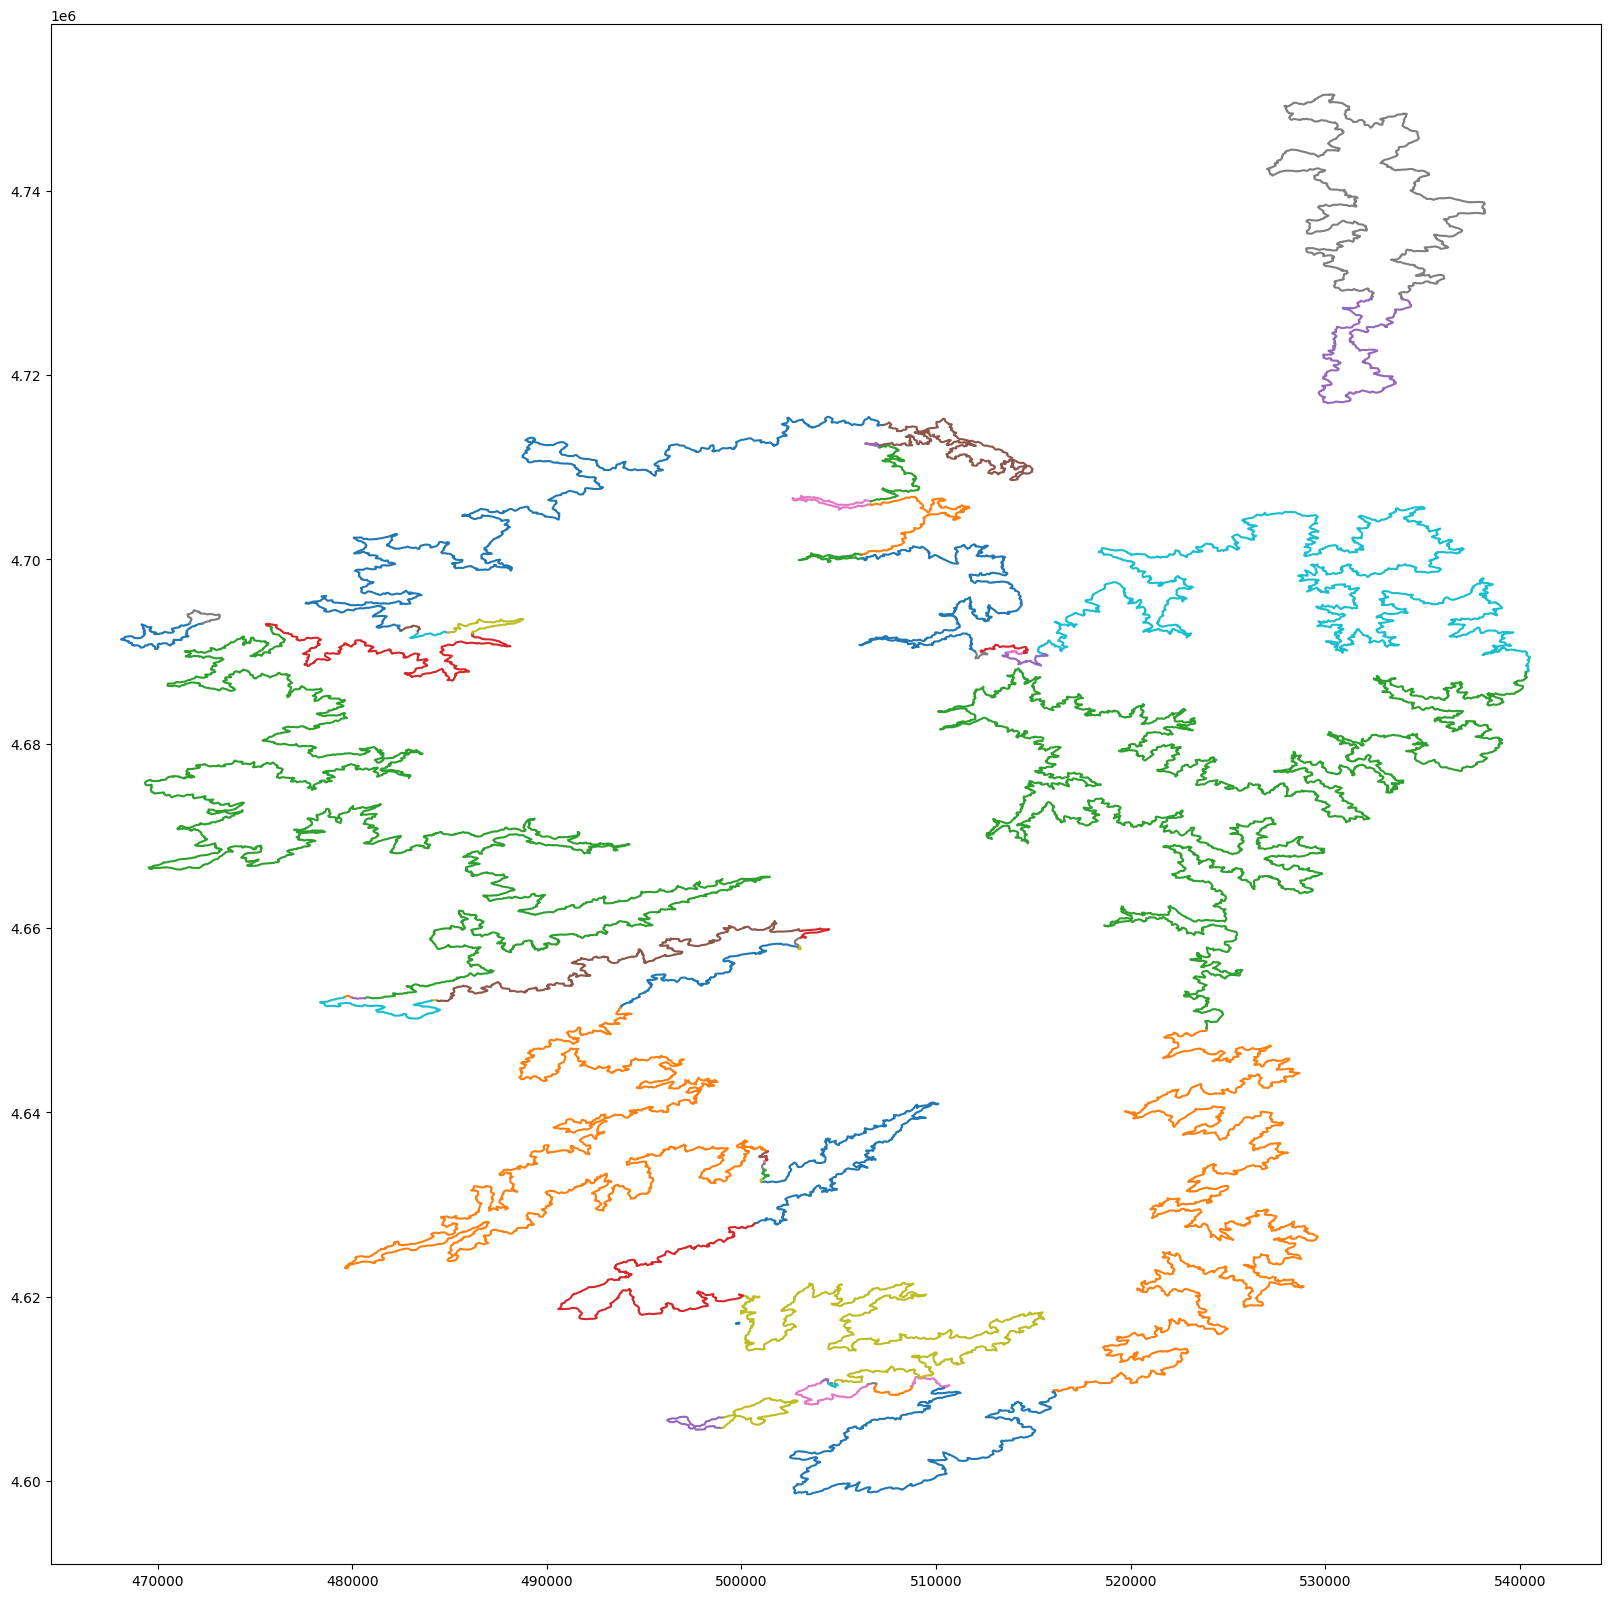

In [16]:
plt.rcParams['figure.figsize']=(20,20)

for ls in level_open_contours_df['geometry']:
    coords=np.array(ls.coords)
    plt.plot(coords[:,0],coords[:,1])


0.7071938514709473


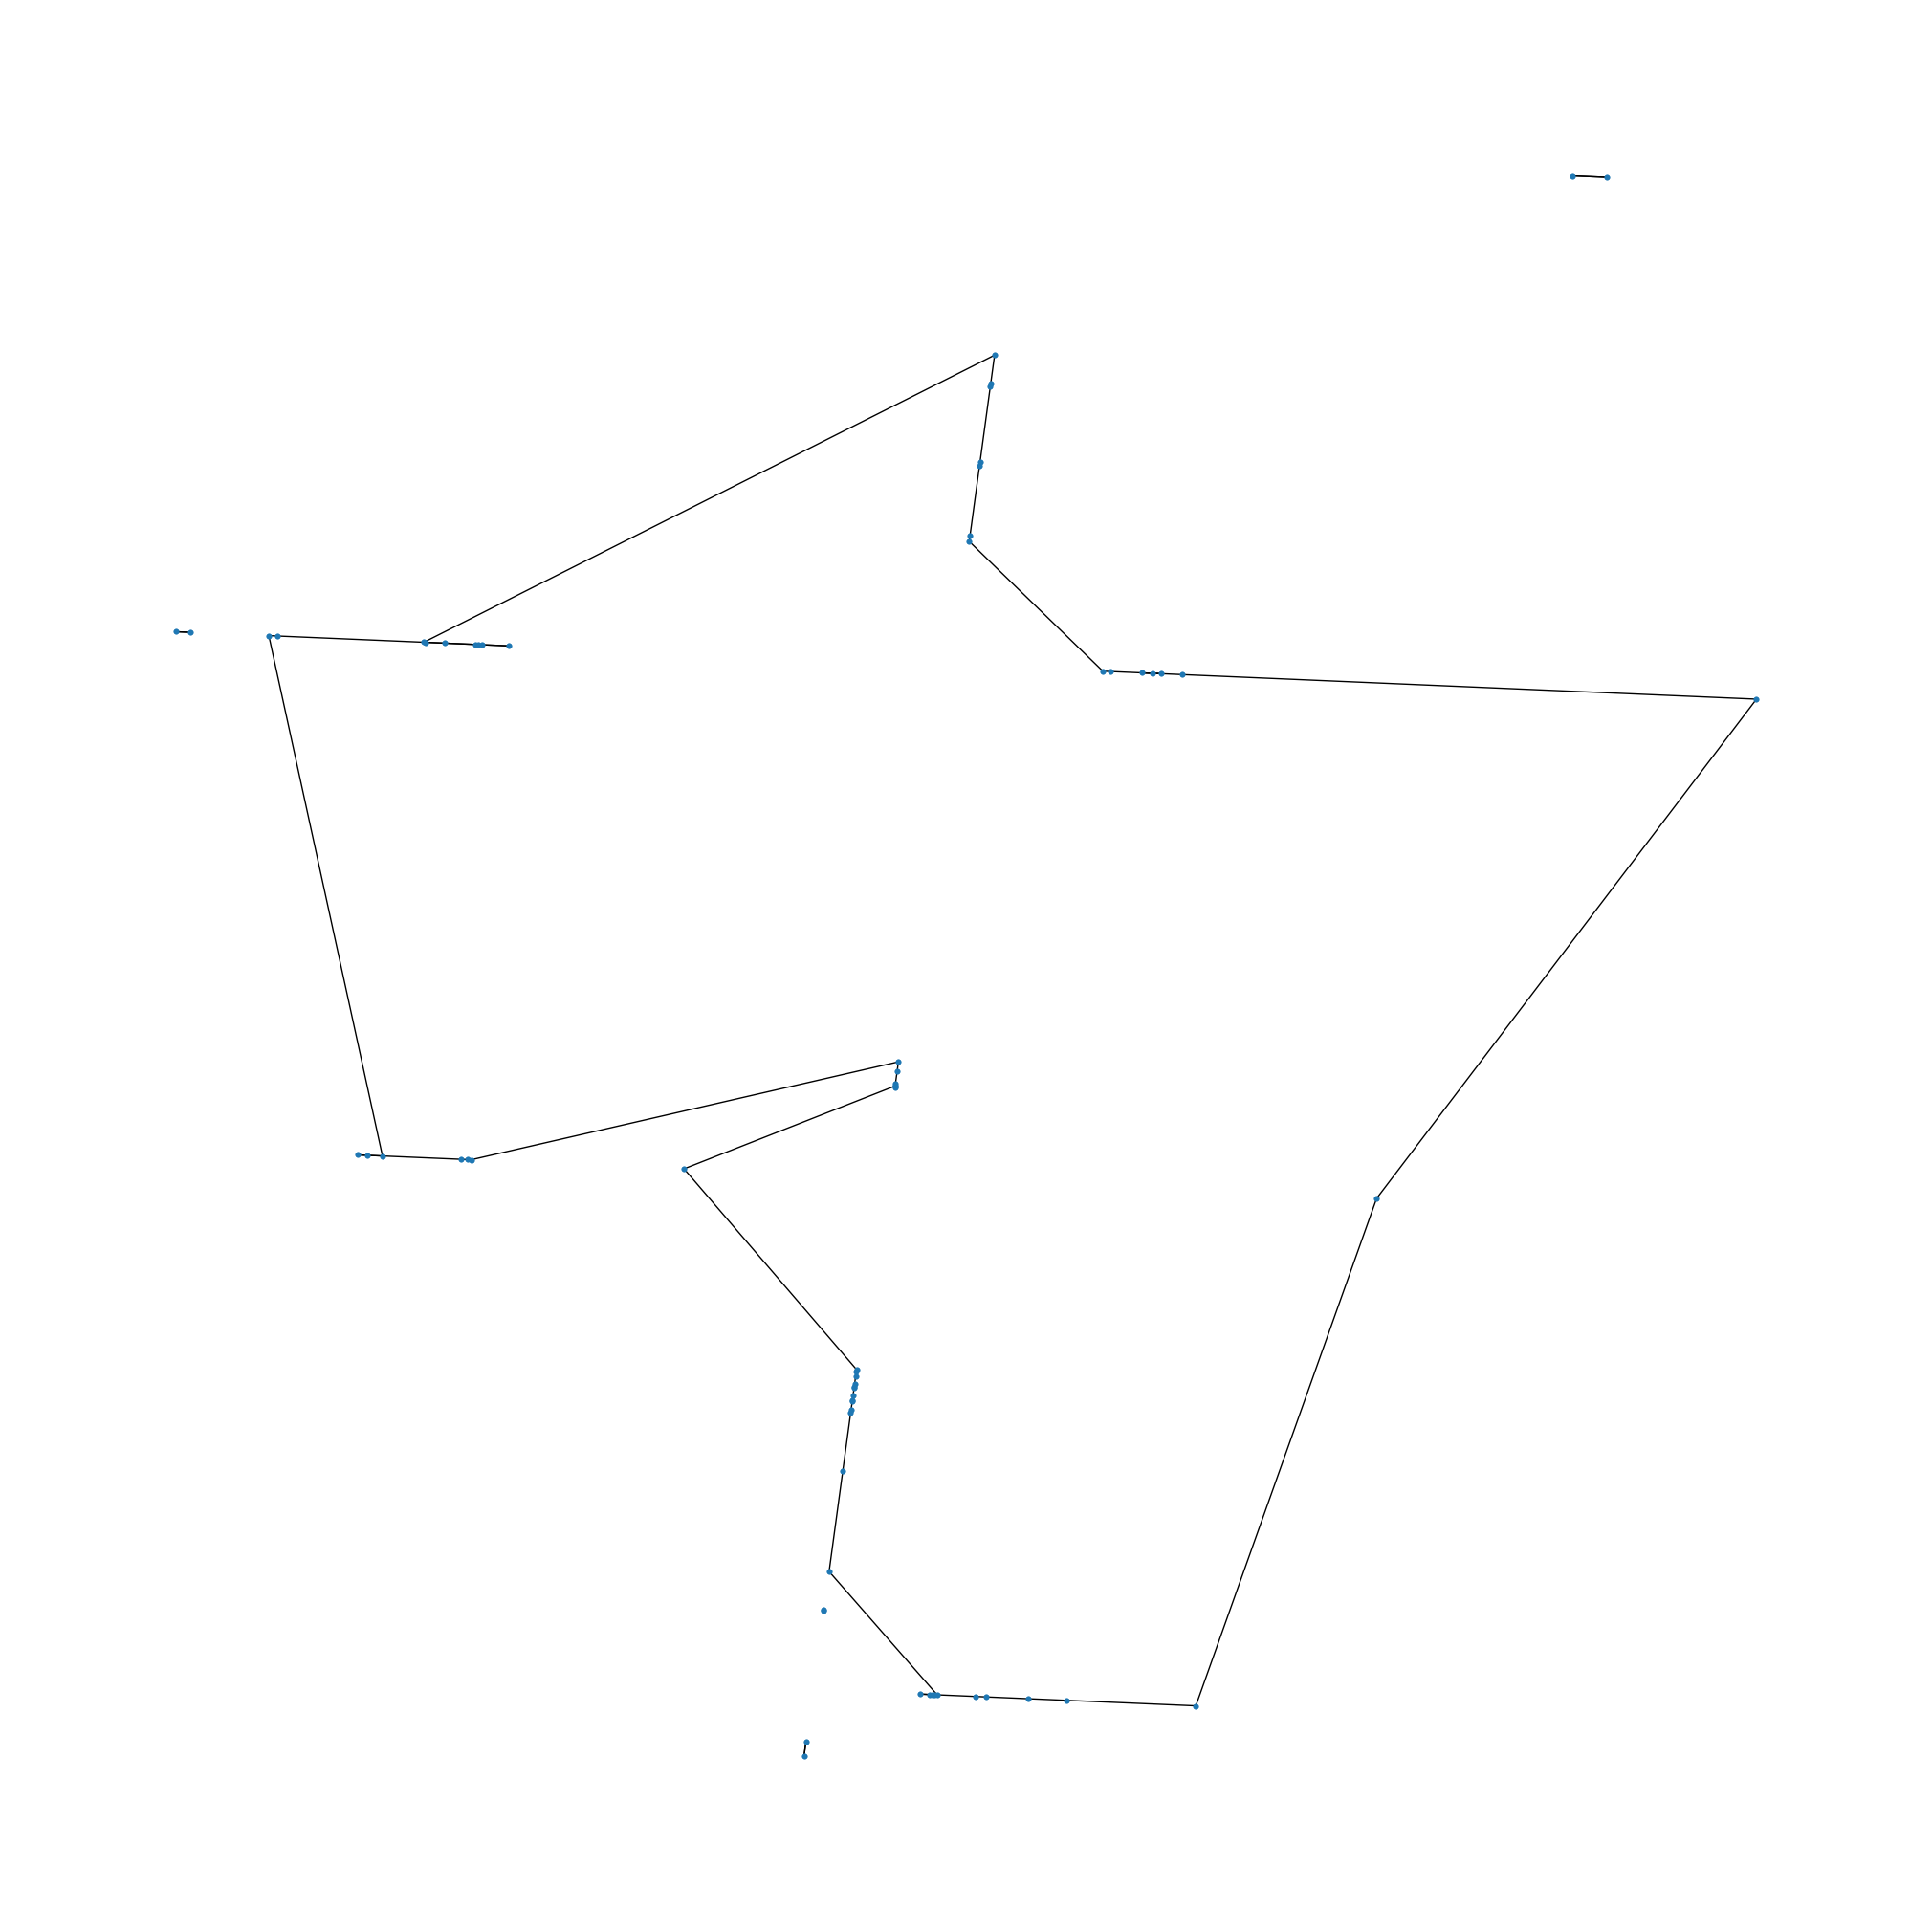

In [17]:
t1=time.time()
G_extremities=build_open_contour_graph(level_open_contours_df,max_distance=1,MLS=None)
t2=time.time()
print(t2-t1)
pos=pos={node:(data['x'],data['y']) for node,data in G_extremities.nodes(data=True)}
nx.draw(G_extremities,pos=pos,node_size=10)

0.020765304565429688


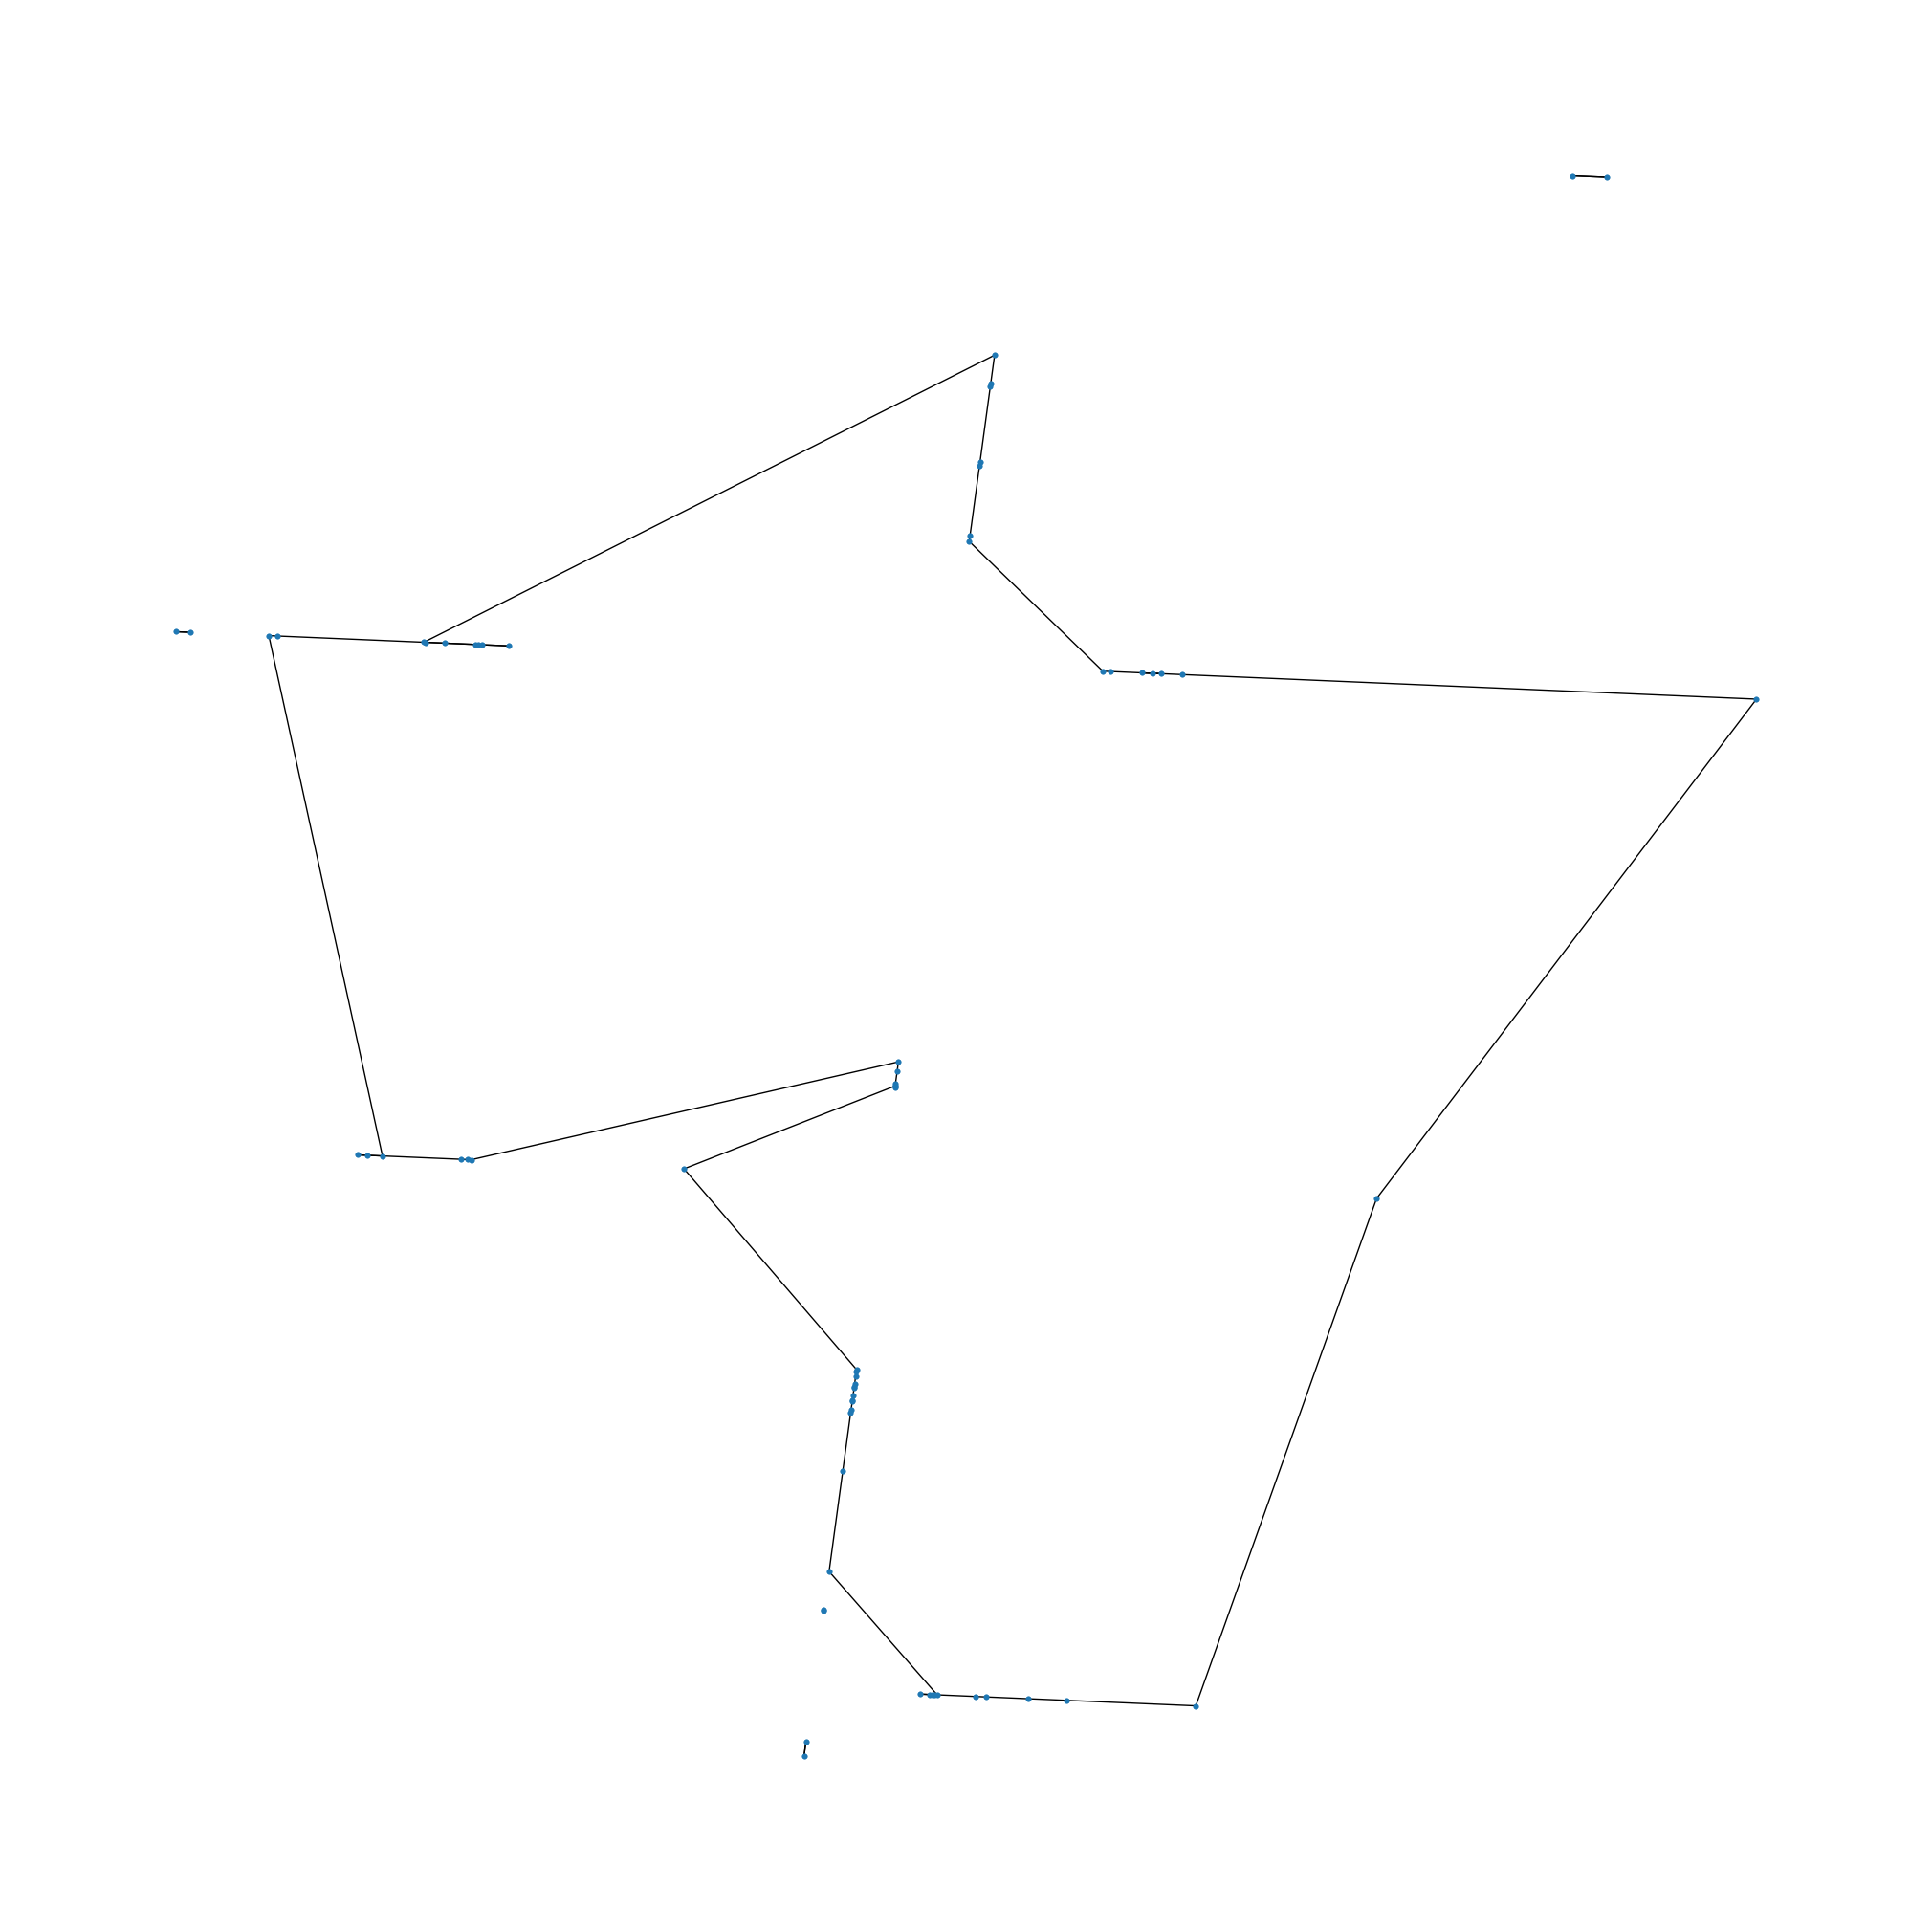

In [18]:
t1=time.time()
clean_graph(G_extremities)
t2=time.time()
print(t2-t1)
nx.draw(G_extremities,pos=pos,node_size=10)

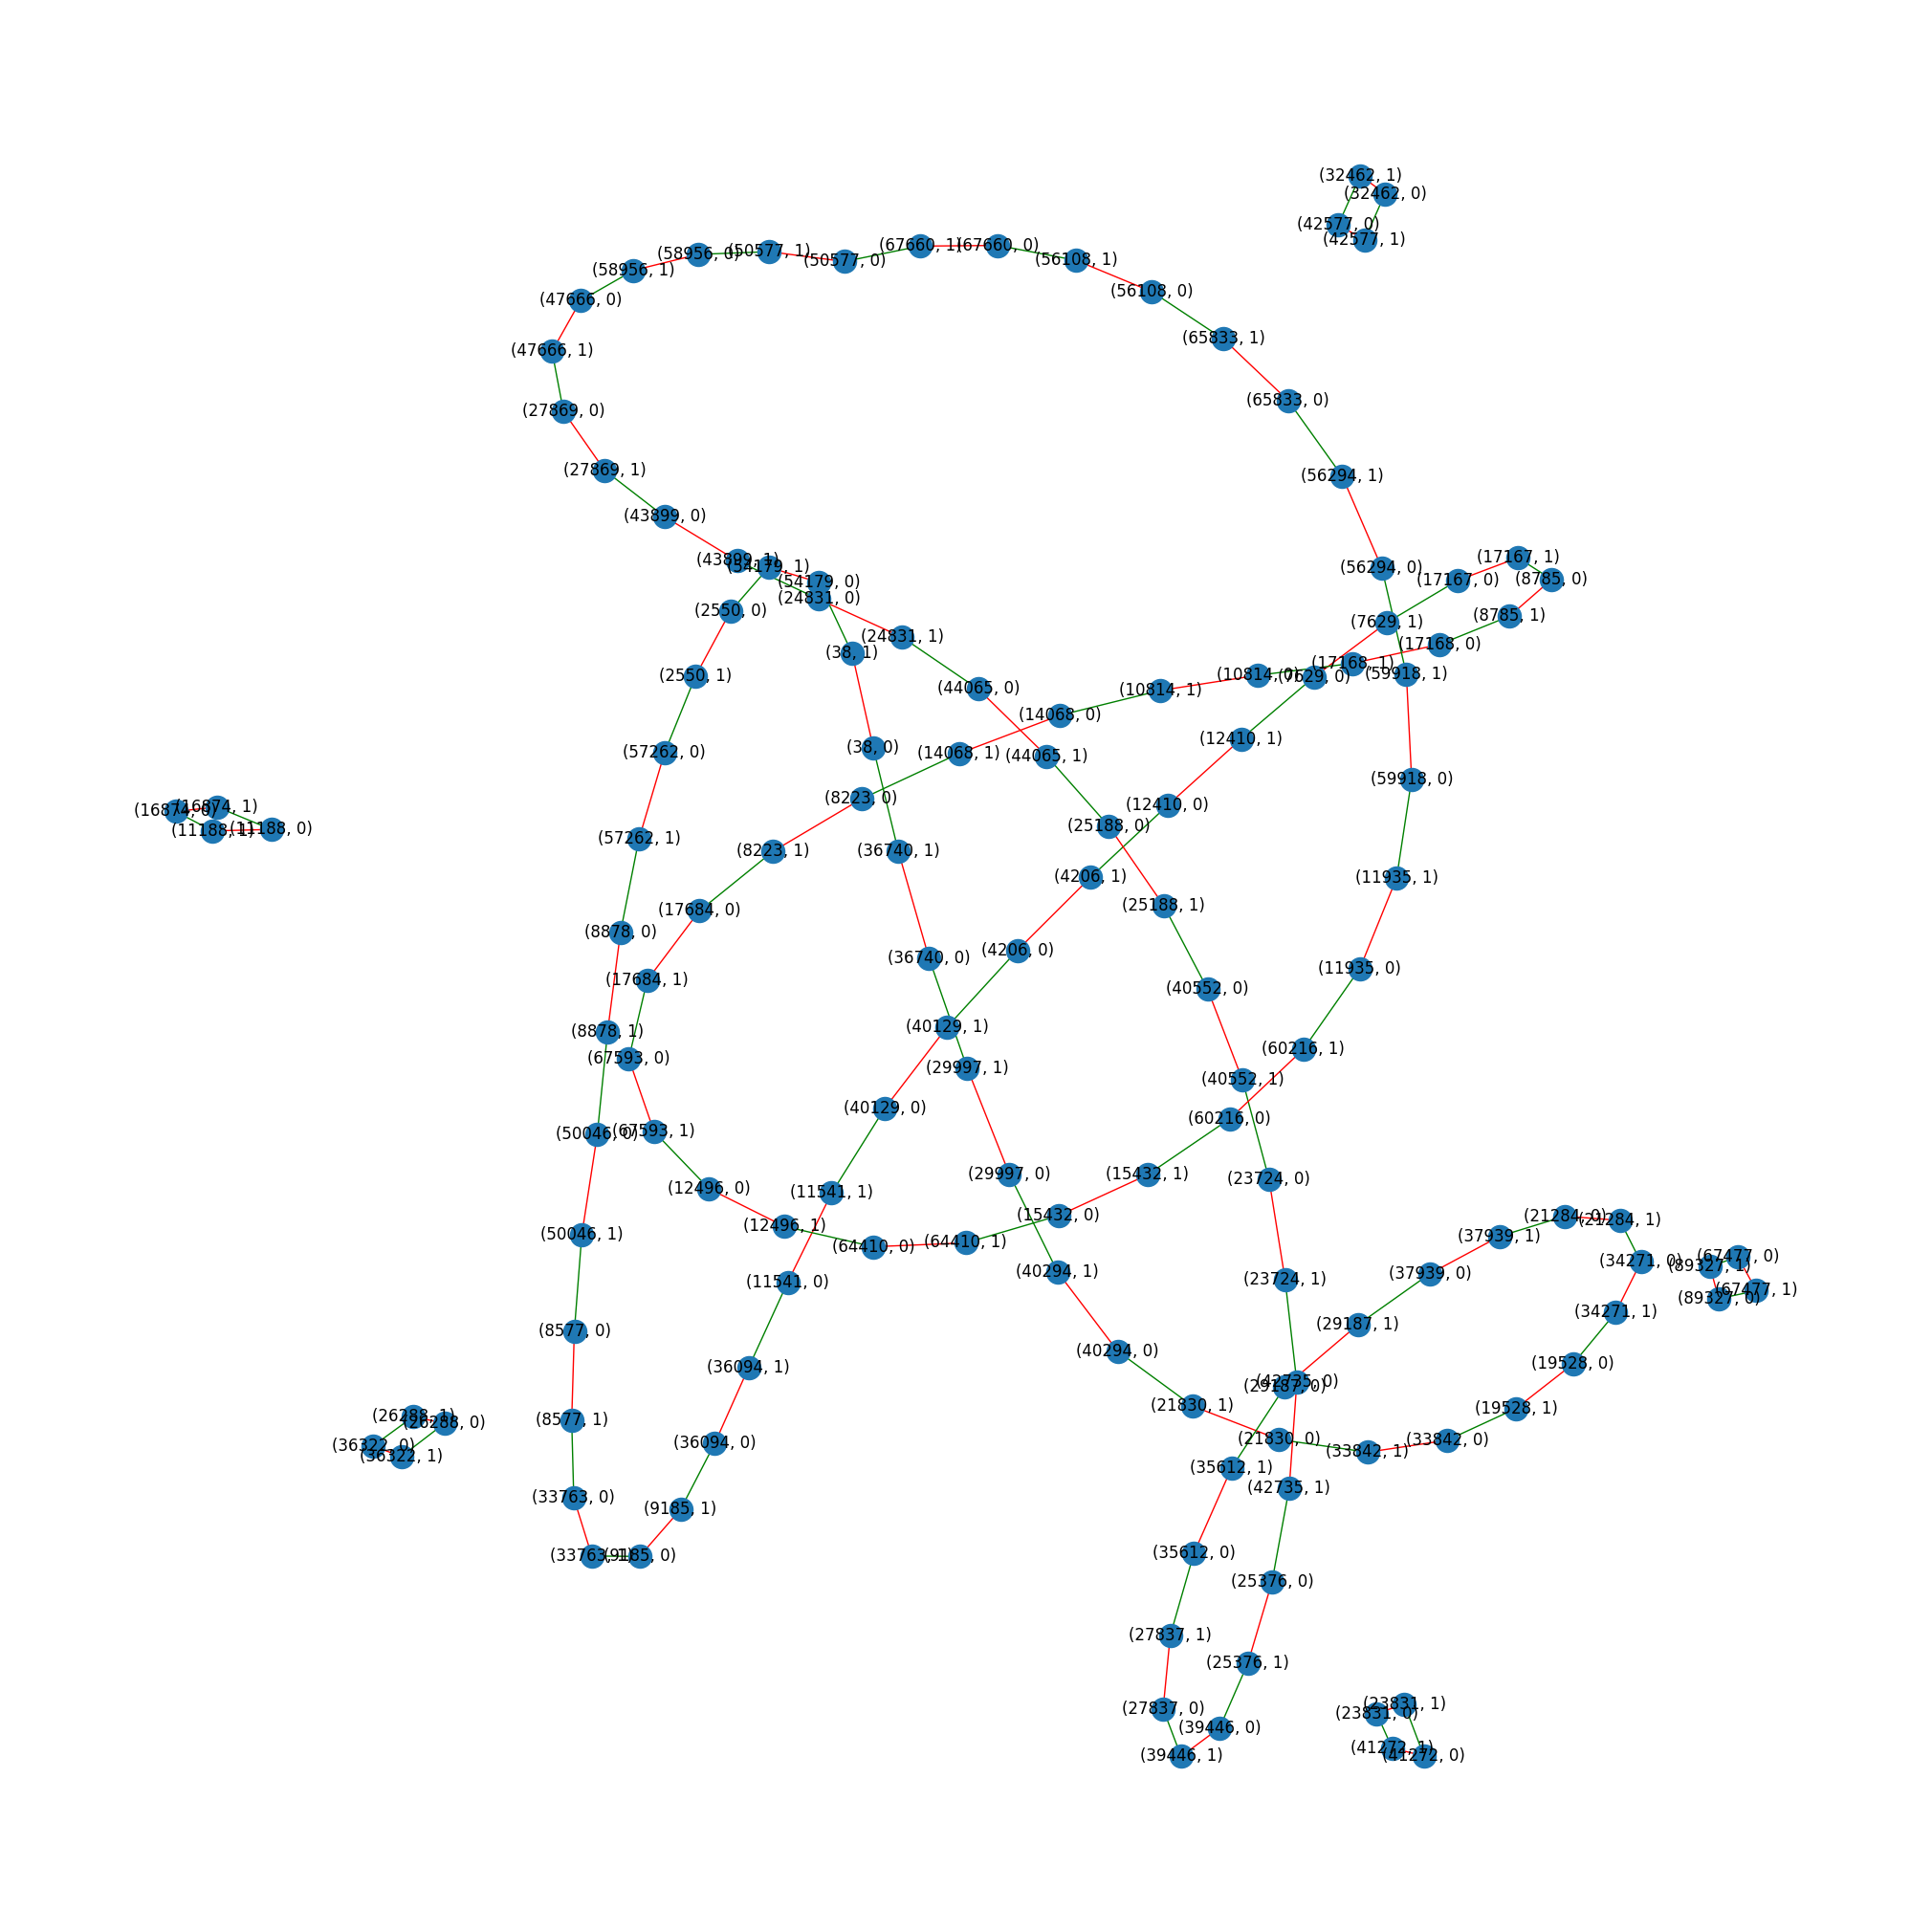

In [19]:
cycles,failed_cycles=cycle_decomposition(G_extremities)

cycle_edges=[(cycle[i],cycle[i+1]) for cycle in cycles for i in range(len(cycle)-1)]
edge_color=[]
for u,v in G_extremities.edges():
    if (u,v) in cycle_edges or (v,u) in cycle_edges:
        if G_extremities.get_edge_data(u,v)['edge_type']=='contour':
            edge_color.append('r')
        else:
            edge_color.append('g')
    else:
        edge_color.append('k')
nx.draw(G_extremities,edge_color=edge_color,with_labels=True)

1.2993299961090088


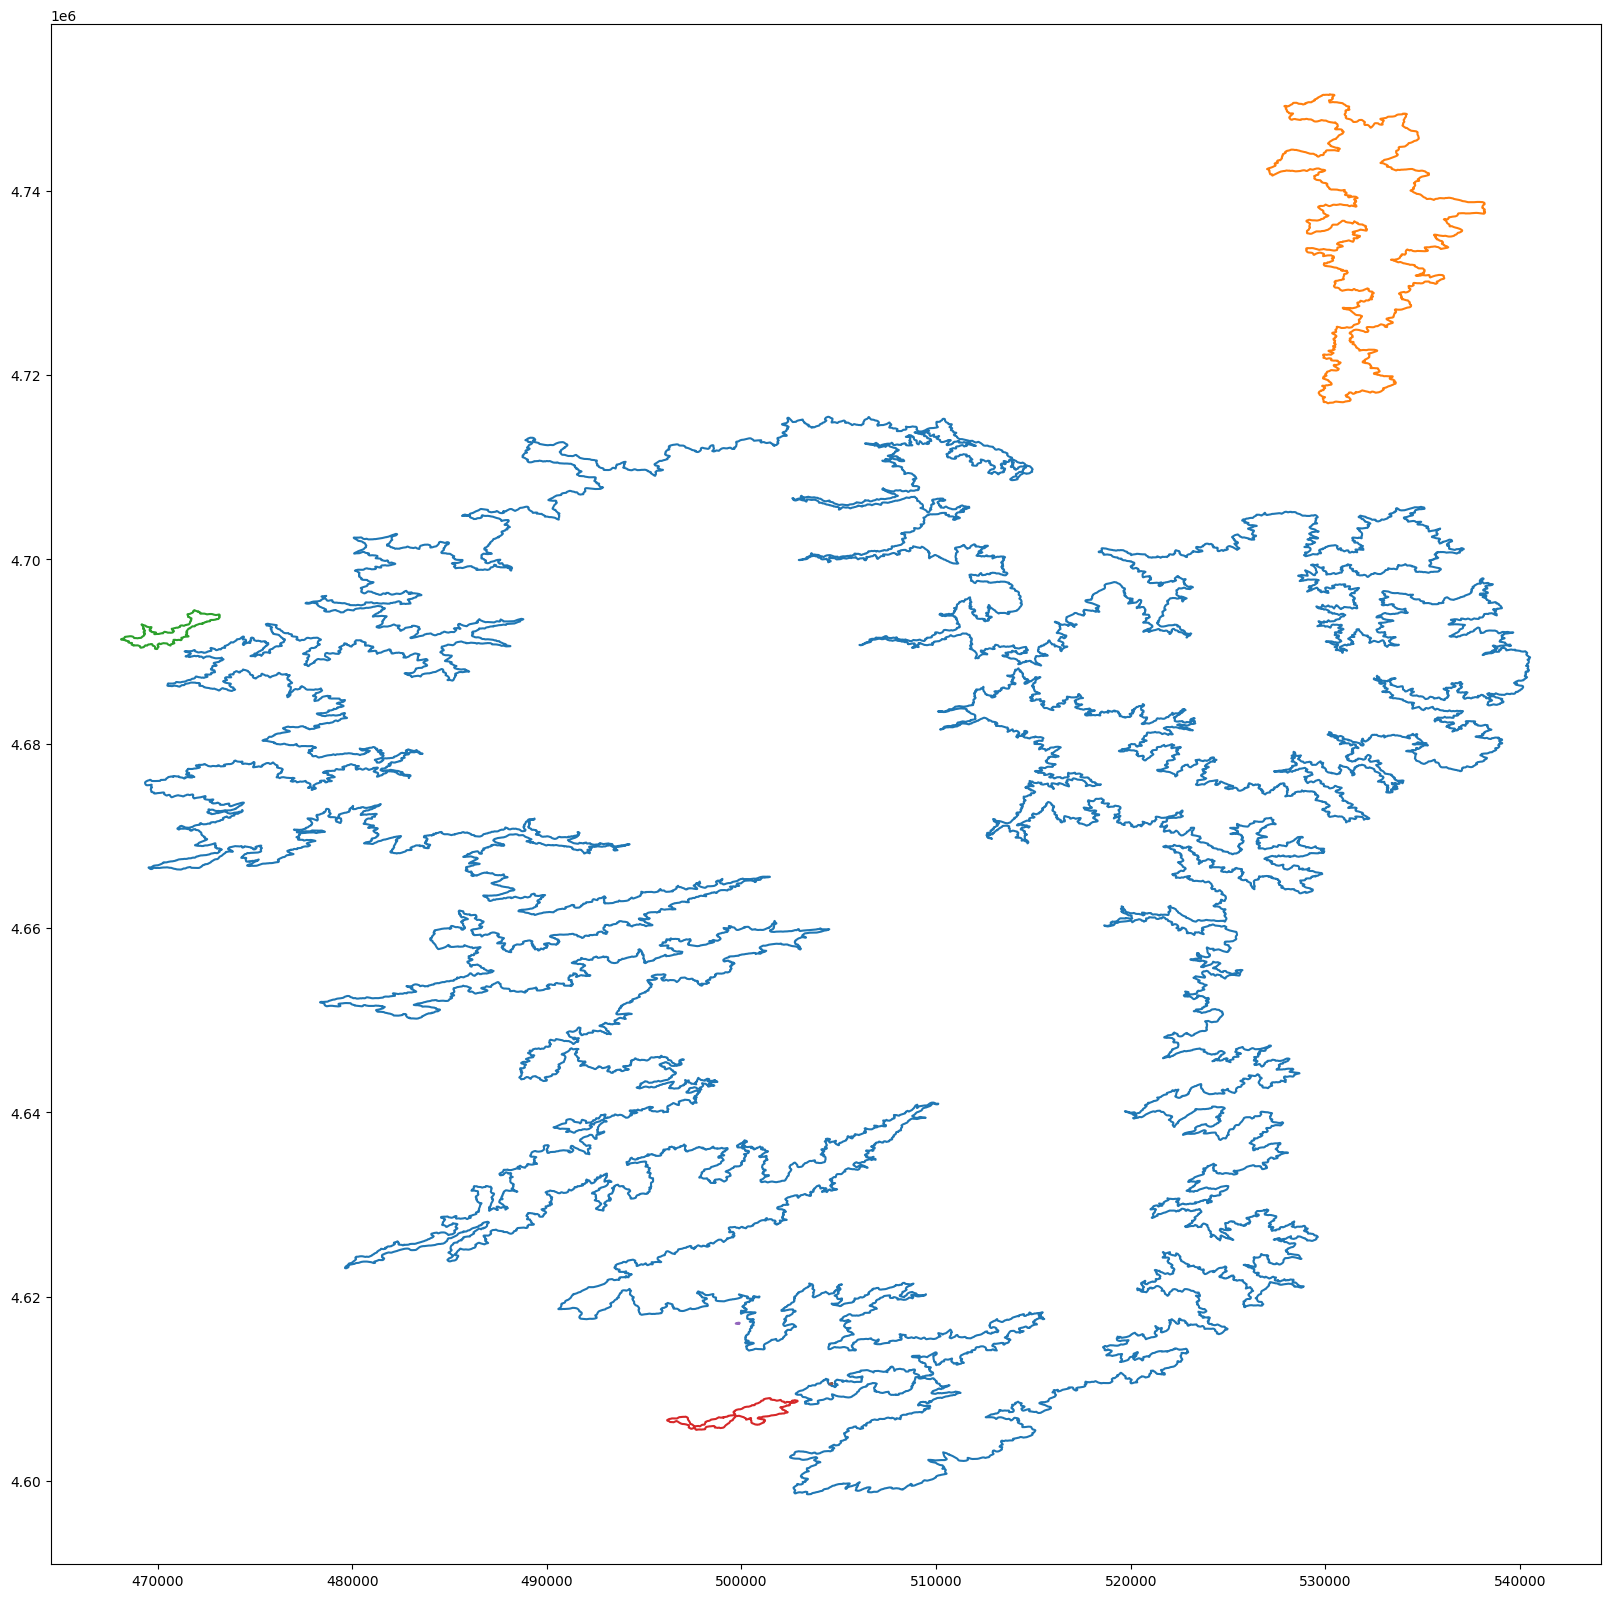

In [20]:
plt.rcParams['figure.figsize']=(20,20)
t1=time.time()
contour_lines=get_contour_lines_from_elevation_df(level_open_contours_df,max_distance=1)
t2=time.time()
print(t2-t1)
for ls in contour_lines:
    coords=np.array(ls.coords)
    plt.plot(coords[:,0],coords[:,1])
